### Import Libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the Dataset

In [33]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
# 1 - Diabatic and 0 - Non Diabatic

In [35]:
df1 = df.copy()

In [36]:
df.describe()   # describing statistical measures

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
df.dtypes  # checking datatypes 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [38]:
df.shape    # Rows - 769 , Columns - 9

(768, 9)

In [39]:
df.isnull().sum()    # Checking null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [40]:
df.duplicated().sum()    # checking the duplicates

0

In [41]:
df['Outcome'].value_counts()    # checking the value counts of target variable 

0    500
1    268
Name: Outcome, dtype: int64

### EDA

In [42]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
36,11,138,76,0,0,33.2,0.420,35,0
536,0,105,90,0,0,29.6,0.197,46,0
750,4,136,70,0,0,31.2,1.182,22,1
463,5,88,78,30,0,27.6,0.258,37,0
333,12,106,80,0,0,23.6,0.137,44,0
253,0,86,68,32,0,35.8,0.238,25,0
118,4,97,60,23,0,28.2,0.443,22,0
2,8,183,64,0,0,23.3,0.672,32,1
263,3,142,80,15,0,32.4,0.200,63,0
156,2,99,52,15,94,24.6,0.637,21,0


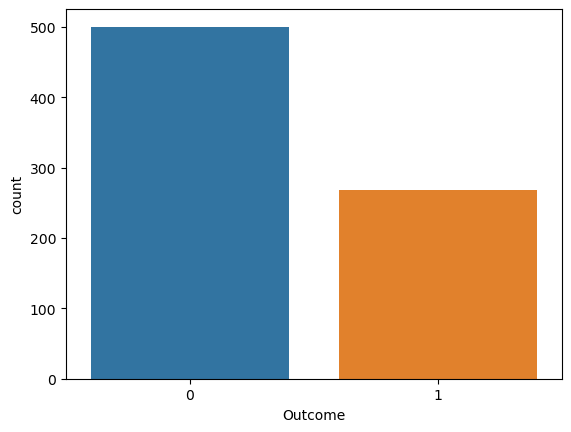

In [43]:
sns.countplot(x=df['Outcome'])
plt.show()

Inference
1) 0 has more count than 1

### Correlation

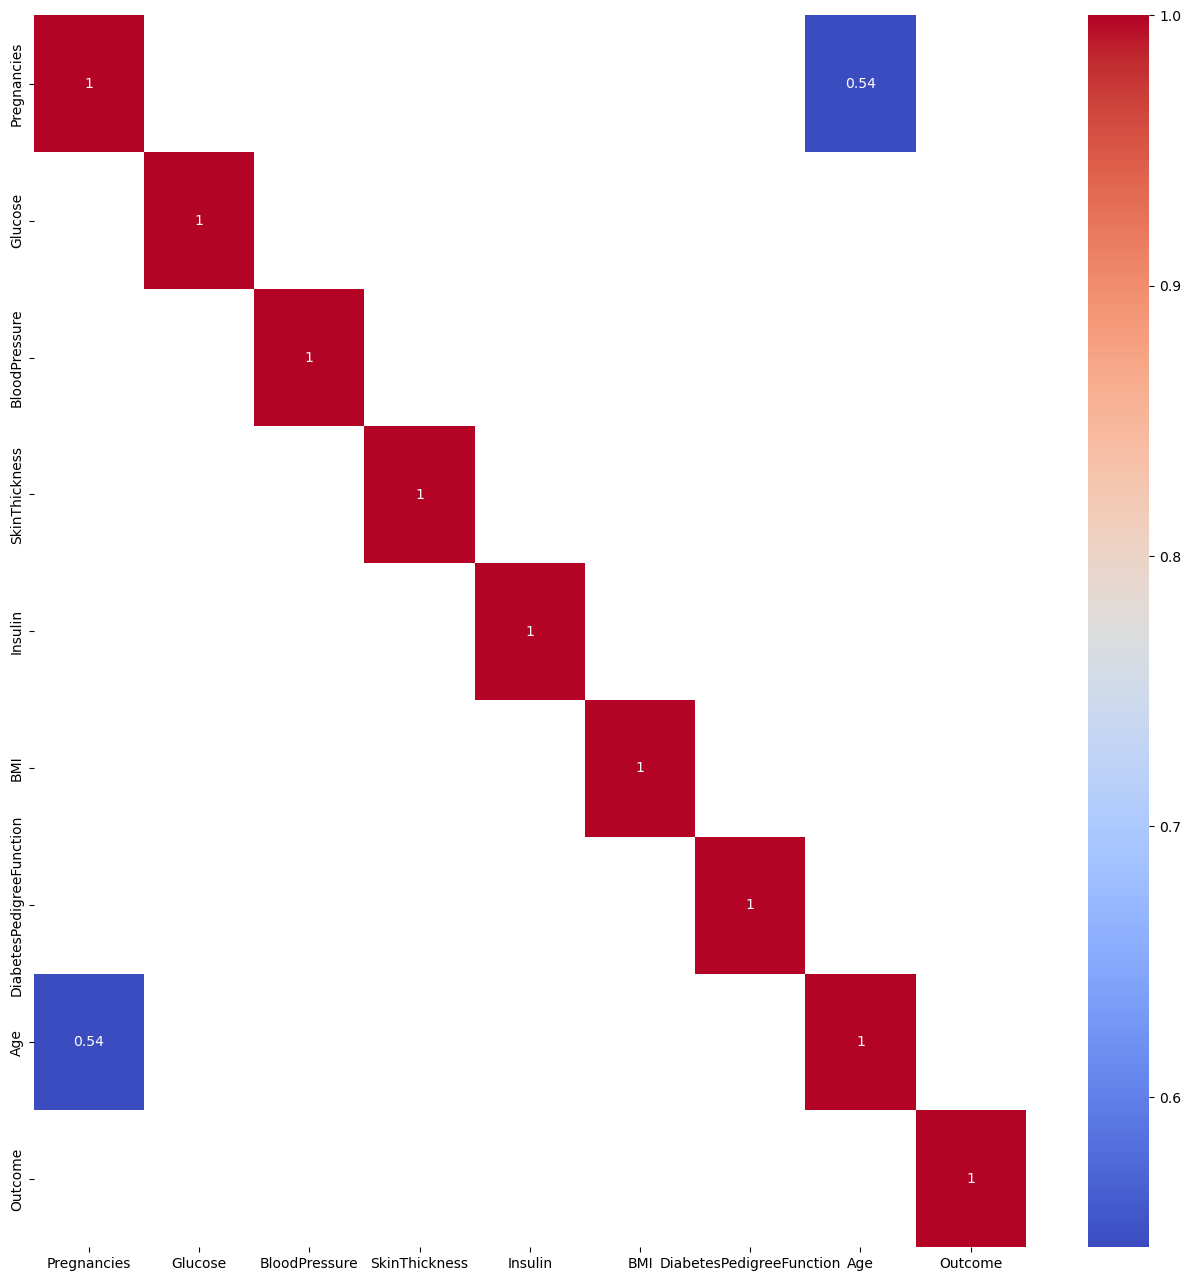

In [44]:
corr = df.corr()

plt.figure(figsize=(16,16))
sns.heatmap(corr[abs(corr)>0.5],annot=True,cmap='coolwarm')
plt.show()

### Inference
1) Age and Pregnancies are correlated

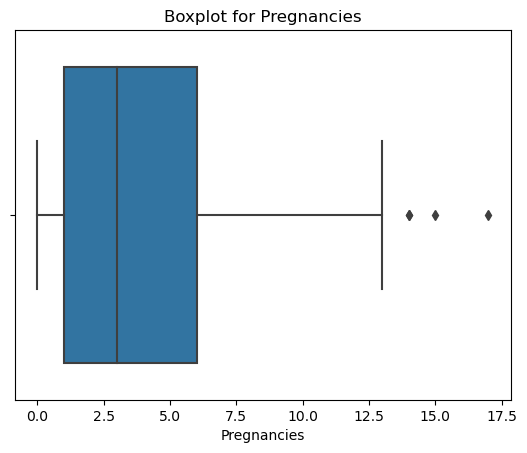

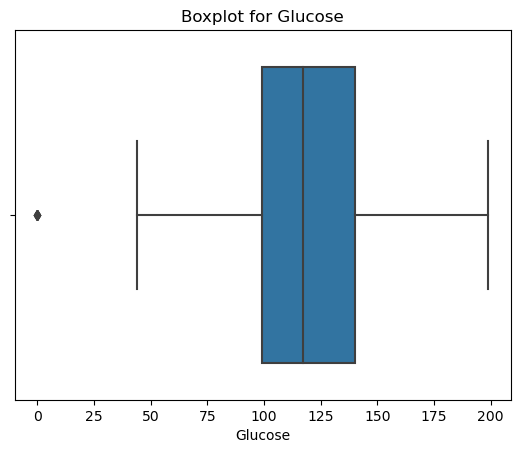

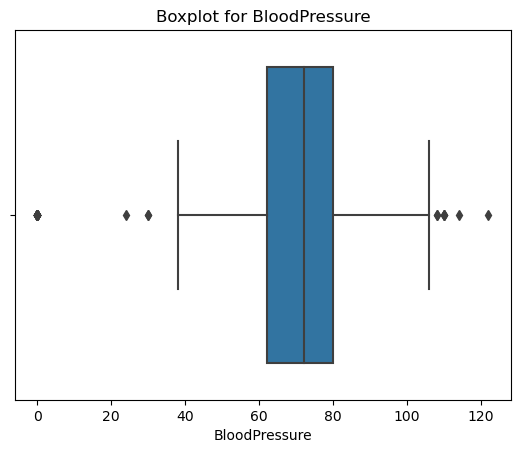

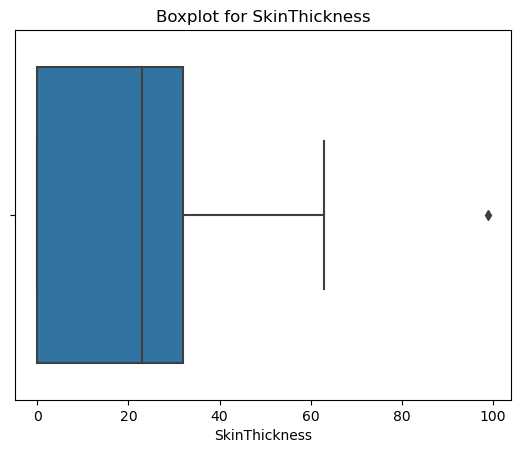

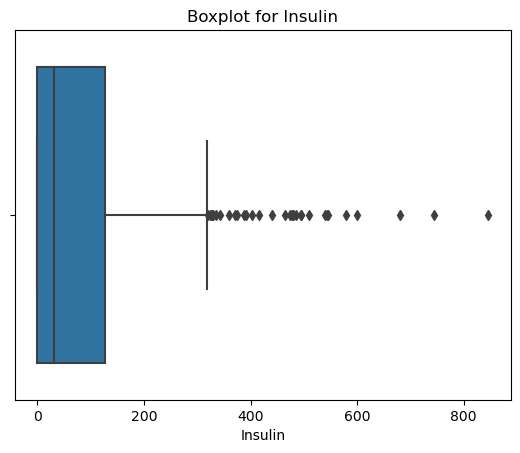

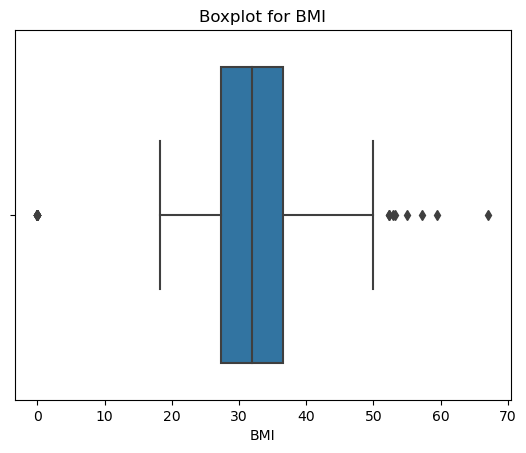

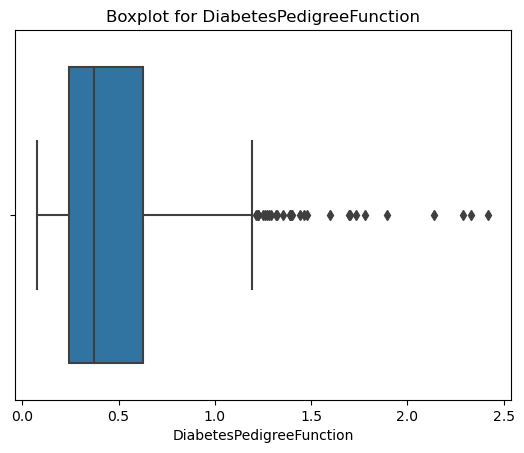

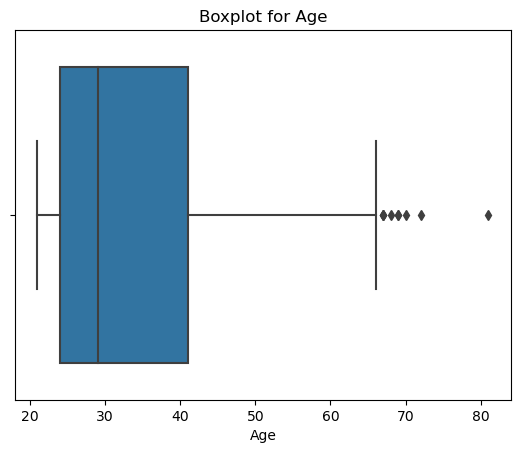

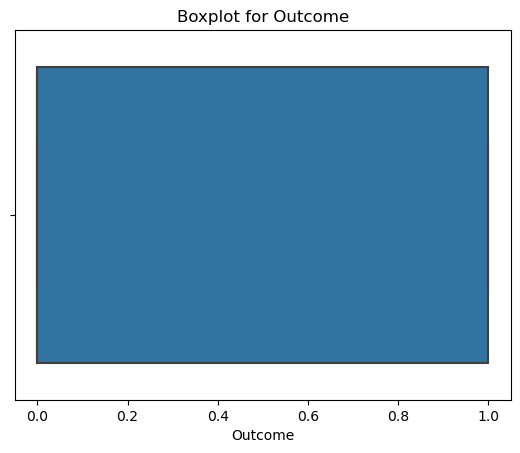

In [45]:
for i in df.columns:        
    plt.title(f'Boxplot for {i}')
    sns.boxplot(x=df[i])
    plt.show()

Inference
1) There are outliers in Pregnancies, Glucose, Bloodpressure, Skinthickness, Insulin, Bmi, DiabetesPedigreeFunction, Age

In [46]:
df.describe(percentiles=[0.01,0.02,0.05,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,5%,50%,97%,98%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,0.00000,0.00000,3.0000,11.00000,12.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,57.00000,69.02000,79.00000,117.0000,187.99000,192.32000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,0.00000,0.00000,38.70000,72.0000,94.99000,99.32000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,0.00000,23.0000,46.00000,48.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,0.00000,30.5000,369.90000,470.94000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,0.00000,19.16800,21.80000,32.0000,46.10000,47.52600,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.09468,0.11902,0.14035,0.3725,1.25793,1.39066,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,21.00000,21.00000,29.0000,62.00000,64.66000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.00000,0.0000,1.00000,1.00000,1.00000,1.00


### Outlier Treatment

In [47]:
lower_end = ['Glucose','DiabetesPedigreeFunction']
upper_end = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [48]:
def outlier_treatment_le(x):      
    x = x.clip(lower=x.quantile(0.01))
    return x

def outlier_treatment_ue(x):       
    x = x.clip(upper=x.quantile(0.99))
    return x

In [49]:
# using clipping method to treating the outlier
df[lower_end] = df[lower_end].apply(outlier_treatment_le)     
df[upper_end] = df[upper_end].apply(outlier_treatment_ue)

In [50]:
df.describe(percentiles=[0.01,0.02,0.05,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,5%,50%,97%,98%,99%,max
Pregnancies,768.0,3.834635,3.336808,0.00000,0.000000,0.00000,0.00000,3.0000,11.00000,12.00000,13.000000,13.00000
Glucose,768.0,121.272135,30.807518,57.00000,57.000000,69.02000,79.00000,117.0000,187.99000,192.32000,196.000000,196.00000
BloodPressure,768.0,69.053385,19.243340,0.00000,0.000000,0.00000,38.70000,72.0000,94.99000,99.32000,106.000000,106.00000
SkinThickness,768.0,20.433125,15.646206,0.00000,0.000000,0.00000,0.00000,23.0000,46.00000,48.00000,51.108900,51.33000
Insulin,768.0,78.604427,109.425722,0.00000,0.000000,0.00000,0.00000,30.5000,369.90000,470.94000,513.267000,519.90000
BMI,768.0,31.936031,7.712781,0.00000,0.000000,19.16800,21.80000,32.0000,46.10000,47.52600,50.250470,50.75900
DiabetesPedigreeFunction,768.0,0.468461,0.314849,0.09468,0.095564,0.11902,0.14035,0.3725,1.25793,1.39066,1.698109,1.69833
Age,768.0,33.205729,11.645318,21.00000,21.000000,21.00000,21.00000,29.0000,62.00000,64.66000,67.000000,67.00000
Outcome,768.0,0.348958,0.476951,0.00000,0.000000,0.00000,0.00000,0.0000,1.00000,1.00000,1.000000,1.00000


### Select x(dependent variable) and y(independent variable)

In [51]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(768, 8)
(768,)


### Split data into train and test

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 8,test_size =0.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [55]:
from  sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

In [56]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [57]:
def eval_model(model,x_train,y_train,x_test,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    cm = confusion_matrix(y_test,ypred)
    cr = classification_report(y_test,ypred)
    pre = precision_score(y_test,ypred)
    rec = recall_score(y_test,ypred)
    res_df = pd.DataFrame({'Train_Acc':train_acc,'Test_Acc':test_acc,
                   'Precision':pre,'Recall':rec},index=[mname])
    print('Confusion_Matrix\n',cm)
    print('Classification Report\n',cr)
    return res_df

### Log Reg

In [58]:
lr1 = LogisticRegression(max_iter=100000)
lr_res = eval_model(lr1,x_train,y_train,x_test,y_test,'LogReg')

Confusion_Matrix
 [[89 13]
 [20 32]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       102
           1       0.71      0.62      0.66        52

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [59]:
lr_res

,Train_Acc,Test_Acc,Precision,Recall
LogReg,0.775244,0.785714,0.711111,0.615385


### Decision_Tree

In [60]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_split=15)
dt_res = eval_model(dt,x_train,y_train,x_test,y_test,'DTree')
dt_res

Confusion_Matrix
 [[78 24]
 [25 27]]
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       102
           1       0.53      0.52      0.52        52

    accuracy                           0.68       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.68      0.68      0.68       154



,Train_Acc,Test_Acc,Precision,Recall
DTree,0.900651,0.681818,0.529412,0.519231


### Random_Forest

In [61]:
rf = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=12,min_samples_split=15)
rf_res = eval_model(rf,x_train,y_train,x_test,y_test,'Random Forest')
rf_res

Confusion_Matrix
 [[83 19]
 [19 33]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       102
           1       0.63      0.63      0.63        52

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



,Train_Acc,Test_Acc,Precision,Recall
Random Forest,0.915309,0.753247,0.634615,0.634615


### KNN

In [62]:
knn = KNeighborsClassifier(n_neighbors=15)
knn_res = eval_model(knn,x_train,y_train,x_test,y_test,'KNN')

Confusion_Matrix
 [[90 12]
 [27 25]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       102
           1       0.68      0.48      0.56        52

    accuracy                           0.75       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.74      0.75      0.73       154



D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

In [63]:
knn_res

,Train_Acc,Test_Acc,Precision,Recall
KNN,0.78013,0.746753,0.675676,0.480769


### AdaBoost

In [64]:
ada = AdaBoostClassifier(n_estimators=70)  # depth of tree = 1
ada_res = eval_model(ada,x_train,y_train,x_test,y_test,'AdaBoost')
ada_res

Confusion_Matrix
 [[82 20]
 [21 31]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       102
           1       0.61      0.60      0.60        52

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



,Train_Acc,Test_Acc,Precision,Recall
AdaBoost,0.837134,0.733766,0.607843,0.596154


### XGBoost

In [65]:
from xgboost import XGBClassifier

In [66]:
xgb = XGBClassifier(objective='binary:logistic',eval_metric='logloss',
                  n_estimators=100,max_depth=4,reg_lambda=0.2,eta=0.3,
                  gamma=0.5, random_state=30)

xgb_res = eval_model(xgb,x_train,y_train,x_test,y_test,'XGBoost')
xgb_res

Confusion_Matrix
 [[80 22]
 [22 30]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       102
           1       0.58      0.58      0.58        52

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



,Train_Acc,Test_Acc,Precision,Recall
XGBoost,0.947883,0.714286,0.576923,0.576923


### Gradient_Boost

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,
                                 random_state=80)
                                 
gbc_res = eval_model(gbc,x_train,y_train,x_test,y_test,'Gradient Boost')
gbc_res  

Confusion_Matrix
 [[86 16]
 [19 33]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       102
           1       0.67      0.63      0.65        52

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



,Train_Acc,Test_Acc,Precision,Recall
Gradient Boost,0.871336,0.772727,0.673469,0.634615


In [69]:
all_res = pd.concat([lr_res,knn_res,dt_res,rf_res,ada_res,gbc_res,xgb_res])
all_res

,Train_Acc,Test_Acc,Precision,Recall
LogReg,0.775244,0.785714,0.711111,0.615385
KNN,0.780130,0.746753,0.675676,0.480769
DTree,0.900651,0.681818,0.529412,0.519231
Random Forest,0.915309,0.753247,0.634615,0.634615
AdaBoost,0.837134,0.733766,0.607843,0.596154
Gradient Boost,0.871336,0.772727,0.673469,0.634615
XGBoost,0.947883,0.714286,0.576923,0.576923


### Inference
1) According to the result i am choosing Log reg it has the highest accuracy of 79%

In [70]:
ypred_lr1 = lr1.predict(x_test)
print(ypred_lr1)

[0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0
 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1
 0 0 0 0 0 0]


In [71]:
actual_ypred_lr1 = ypred_lr1  

res_df = pd.DataFrame({'Actual_y_test':y_test,'Pred':actual_ypred_lr1})
res_df.sample(10)

,Actual_y_test,Pred
124,1,0
486,0,0
687,0,0
327,0,1
590,1,1
652,0,0
690,0,0
506,1,1
111,1,1
307,0,0


### Conclusions

The machine learning model used for diabetes prediction that the candidate is likely to have diabetes.This conclusion is based on the data provided, which includes features such as the number of pregnancies, glucose levels, blood pressure, skin thickness, insulin levels, BMI, Diabetes pedigree function and age.